## Imports

In [1]:
import pandas as pd
from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import DBSCAN
from collections import Counter
import datetime
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

##### Standard data visualisaton params for Jupyter

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 15, 2
sb.set_style('whitegrid')

## Getting the dataset

In [3]:
address = '../datasets/staandelamp_realistic.json'
# address = '../datasets/staandelamp_realistic_huge.json'
df_data = pd.read_json(address)

##### Sort the data on timestamp

In [4]:
df_data = df_data.sort_values(by=['time'])

##### Cut off the dataset

In [5]:
df_data = df_data[:42]
# df_data = df_data[:40000]

##### Show the first 5 entrys of the dataset

In [6]:
print(df_data.shape)
df_data.head()

(42, 3)


,name,state,time
2,Staande_Lamp_3,0,1509489940655
6,Staande_Lamp_5,1,1509490011225
0,Staande_Lamp_1,1,1509491943009
1,Staande_Lamp_2,0,1509492221471
3,Staande_Lamp_3,1,1509492826941


## Cleaning the dataset

##### Reformat the first column to iterables:
<font color='#ccc'>
    To prevent the following error when building the DBSCAN model<br>
    ValueError: could not convert string to float: 'Staande_Lamp_5'
</font> 

In [7]:
d = defaultdict(LabelEncoder)
df_fit = df_data.apply(lambda x: d[x.name].fit_transform(x))
df_fit['time'] = df_data['time']
df_fit['state'] = df_data['state']

##### Show the changes to the dataset

In [8]:
print('before:\n', df_data.head())
print('\n')
print('after:\n', df_fit.head())

before:
              name  state           time
2  Staande_Lamp_3      0  1509489940655
6  Staande_Lamp_5      1  1509490011225
0  Staande_Lamp_1      1  1509491943009
1  Staande_Lamp_2      0  1509492221471
3  Staande_Lamp_3      1  1509492826941


after:
    name  state           time
2     2      0  1509489940655
6     4      1  1509490011225
0     0      1  1509491943009
1     1      0  1509492221471
3     2      1  1509492826941


## Setup variables
(300000 milliseconds = 5 minutes)

In [9]:
five_minutes = 300000
min_samples_untill_its_a_cluster = 2

## Fit the model

In [10]:
model = DBSCAN(
    eps=five_minutes, 
    min_samples=min_samples_untill_its_a_cluster
).fit(df_fit)

## Clustering

In [11]:
# DEBUG
print('datapoints per cluster (count)', Counter(model.labels_))
print('amount of data:', df_fit.shape[0])
print('amount of clusters (count)', max(Counter(model.labels_)))
print('amount of outliers:', df_fit[model.labels_==-1].shape[0])

datapoints per cluster (count) Counter({-1: 12, 2: 5, 6: 4, 10: 4, 7: 3, 0: 2, 1: 2, 3: 2, 4: 2, 5: 2, 8: 2, 9: 2})
amount of data: 42
amount of clusters (count) 10
amount of outliers: 12


##### Create a color dictionary for the scatter-plot

In [12]:
COLOR_MAP = {}
for n in set(model.labels_):
    if n % 3 == 0:
        COLOR_MAP[n] = 'firebrick'
    elif n % 3 == 1:
        COLOR_MAP[n] = 'darkgreen'
    else:
        COLOR_MAP[n] = 'darkblue'

#Outliers
COLOR_MAP[-1] = 'lightgrey'

##### Create the graph

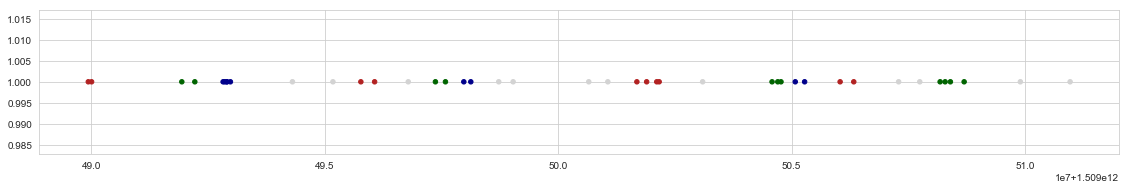

In [13]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])

colors = [COLOR_MAP[l] for l in model.labels_]

# use first column as X value
X = df_fit.iloc[:,2]
# set nr 1 as the value for y so it will be 1Dimentional
Y = [1] * df_fit.shape[0]

ax.scatter(X, Y, c=colors, s=20)

![title](../datasets/images/expected_6_hours_realistic_legend.png)
![title](../datasets/images/expected_6_hours_realistic_sub_clustering.png)